In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as scs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

In [2]:
df = pd.read_csv('data_correlation_gone.csv',index_col = 0)

In [3]:
check_col = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','distance_from_a_city']

In [4]:
def remove_outliers(df, col, threshold = 2.5):
    zscores = scs.zscore(df[col])
    indices = np.abs(np.where(zscores > threshold))
    return indices[0]


all_indices = []
for col in check_col:
    indices = remove_outliers(df, col, threshold = 2.5)
    all_indices.extend(indices)
all_indices = np.unique(all_indices)

In [5]:
df.reset_index(drop=True,inplace=True)

In [6]:
df.drop(all_indices,axis=0,inplace= True)

In [7]:
df['sqft_lot'].describe()

count    15703.000000
mean      8057.197223
std       5642.779385
min        520.000000
25%       4832.000000
50%       7200.000000
75%       9576.000000
max      38644.000000
Name: sqft_lot, dtype: float64

In [8]:
df = df.loc[df['condition']>=3]

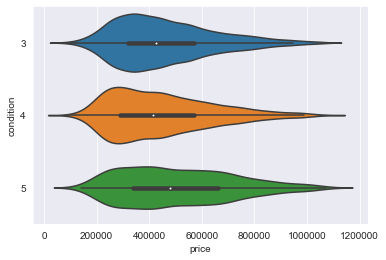

In [9]:
sns.violinplot(x='price', y='condition', data=df, orient='h')
plt.show()

In [10]:
df['condition'].value_counts()

3    10196
4     4168
5     1204
Name: condition, dtype: int64

In [11]:
df['cond3'] = df.condition.apply(lambda x: 1 if x ==3 else 0)
df['cond4'] = df.condition.apply(lambda x: 1 if x ==4 else 0)
df['cond5'] = df.condition.apply(lambda x: 1 if x ==5 else 0)

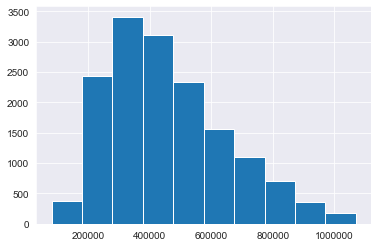

In [12]:
df['price'].hist()

In [13]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city','Age_of_House',
           'Years_last_renovation']

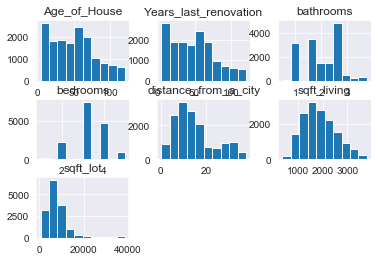

In [14]:
df[features].hist();

In [15]:
df.shape

(15568, 22)

In [16]:
tobox =['sqft_living','sqft_lot','distance_from_a_city','Age_of_House',
           'Years_last_renovation']

In [17]:
for feat in tobox:
    df[feat],b = scs.boxcox(df[feat])


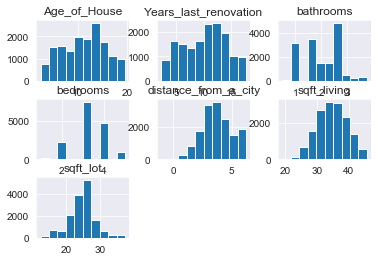

In [18]:
df[features].hist();

In [19]:
def norm_feat(series):
    return (series - series.mean())/series.std()

In [20]:
norm = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city','Age_of_House','grade',
           'Years_last_renovation']


In [21]:
for feat in norm:
    df[feat] = norm_feat(df[feat])


In [22]:
# tomodel = ['distance_from_a_city','Years_last_renovation','sqft_living']

In [23]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode',
       'Age_of_House', 'Years_last_renovation', 'basement', 'biggerliving',
       'biggerlot', 'distance_from_a_city', 'distance_from_airport', 'cond3',
       'cond4', 'cond5'],
      dtype='object')

In [24]:
# x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city',
#            'Age_of_House','basement','bedbath','grade']
# outcome = ['price']

In [25]:
x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city','Years_last_renovation',
           'basement','grade']
outcome = ['price']

In [26]:
x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city','Years_last_renovation',
           'basement', 'cond3','grade','biggerliving','biggerlot',
 'cond4', 'cond5']
outcome = ['price']

In [27]:
X = df[x_cols]
y = df['price']

In [28]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     3138.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:26:10   Log-Likelihood:            -2.0192e+05
No. Observations:               15568   AIC:                         4.039e+05
Df Residuals:                   15555   BIC:                         4.040e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.315e+04   1109.229    -11.851      0.000   -1.53e+04    -1.1e+04
bathrooms              5366.1129   1423.965      3.768      0.000    2574.976    8157.250
sqft_living            9.622e+04   1811.819     53.107      0.000    9.27e+04    9.98e+04
sqft_lot               7814.2083   1099.694      7.106      0.000    5658.680    9969.737
distance_from_a_city  -1.048e+05   1003.833   -104.409      0.000   -1.07e+05   -1.03e+05
Years_last_renovation  1.482e+04   1330.773     11.134      0.000    1.22e+04    1.74e+04
basement              -2.541e+04   1912.017    -13.291      0.000   -2.92e+04   -2.17e+04
cond3                  4.728e+05   1624.640    291.039      0.000     4.7e+05    4.76e+05
grade                  5.769e+04   1316.858     43.810      0.000    5.51e+04    6.03e+04
biggerliving          -2.561e+04   2051.828    -12.483      0.000   -2.96e+04   -2.16e+04
biggerlot             -3321.1469   1807.905     -1.837      0.066   -6864.852     222.558
cond4                  4.915e+05   2120.503    231.791      0.000    4.87e+05    4.96e+05
cond5                  5.234e+05   3383.703    154.677      0.000    5.17e+05     5.3e+05
==============================================================================
Omnibus:                      655.013   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1040.231
Skew:                           0.377   Prob(JB):                    1.31e-226
Kurtosis:                       4.018   Cond. No.                         7.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

13 12
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'distance_from_a_city']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-1.315e+04,1109.229,-11.851,0.0,-1.53e+04,-1.1e+04
bathrooms,5366.1129,1423.965,3.768,0.0,2574.976,8157.250
sqft_living,9.622e+04,1811.819,53.107,0.0,9.27e+04,9.98e+04
sqft_lot,7814.2083,1099.694,7.106,0.0,5658.680,9969.737
distance_from_a_city,-1.048e+05,1003.833,-104.409,0.0,-1.07e+05,-1.03e+05


In [30]:
X = df[x_cols]
y= df['price']

In [31]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     3422.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:26:16   Log-Likelihood:            -2.0192e+05
No. Observations:               15568   AIC:                         4.039e+05
Df Residuals:                   15556   BIC:                         4.040e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms               -1.31e+04   1109.036    -11.812      0.000   -1.53e+04   -1.09e+04
bathrooms              5256.5985   1422.825      3.694      0.000    2467.696    8045.501
sqft_living            9.629e+04   1811.517     53.156      0.000    9.27e+04    9.98e+04
sqft_lot               7267.9291   1058.805      6.864      0.000    5192.549    9343.309
distance_from_a_city  -1.047e+05   1002.826   -104.428      0.000   -1.07e+05   -1.03e+05
Years_last_renovation  1.494e+04   1329.194     11.239      0.000    1.23e+04    1.75e+04
basement              -2.543e+04   1912.148    -13.298      0.000   -2.92e+04   -2.17e+04
cond3                  4.716e+05   1489.830    316.575      0.000    4.69e+05    4.75e+05
grade                  5.776e+04   1316.456     43.874      0.000    5.52e+04    6.03e+04
biggerliving          -2.582e+04   2049.040    -12.599      0.000   -2.98e+04   -2.18e+04
cond4                  4.905e+05   2041.730    240.218      0.000    4.86e+05    4.94e+05
cond5                  5.223e+05   3332.045    156.749      0.000    5.16e+05    5.29e+05
==============================================================================
Omnibus:                      654.701   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1040.794
Skew:                           0.376   Prob(JB):                    9.87e-227
Kurtosis:                       4.019   Cond. No.                         7.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.7720249836590432),
 ('bathrooms', 2.916631506507486),
 ('sqft_living', 4.727846715887494),
 ('sqft_lot', 1.6151400212729563),
 ('distance_from_a_city', 1.448872284507009),
 ('Years_last_renovation', 2.5453949912191254),
 ('basement', 1.226908628890115),
 ('cond3', 2.0944829464008103),
 ('grade', 2.4968418832894113),
 ('biggerliving', 1.4750599420901997),
 ('cond4', 1.608043946825148),
 ('cond5', 1.237148474783216)]

In [33]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5.5]
print(len(vif_scores), len(x_cols))

12 12


In [34]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     3422.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:26:19   Log-Likelihood:            -2.0192e+05
No. Observations:               15568   AIC:                         4.039e+05
Df Residuals:                   15556   BIC:                         4.040e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms               -1.31e+04   1109.036    -11.812      0.000   -1.53e+04   -1.09e+04
bathrooms              5256.5985   1422.825      3.694      0.000    2467.696    8045.501
sqft_living            9.629e+04   1811.517     53.156      0.000    9.27e+04    9.98e+04
sqft_lot               7267.9291   1058.805      6.864      0.000    5192.549    9343.309
distance_from_a_city  -1.047e+05   1002.826   -104.428      0.000   -1.07e+05   -1.03e+05
Years_last_renovation  1.494e+04   1329.194     11.239      0.000    1.23e+04    1.75e+04
basement              -2.543e+04   1912.148    -13.298      0.000   -2.92e+04   -2.17e+04
cond3                  4.716e+05   1489.830    316.575      0.000    4.69e+05    4.75e+05
grade                  5.776e+04   1316.456     43.874      0.000    5.52e+04    6.03e+04
biggerliving          -2.582e+04   2049.040    -12.599      0.000   -2.98e+04   -2.18e+04
cond4                  4.905e+05   2041.730    240.218      0.000    4.86e+05    4.94e+05
cond5                  5.223e+05   3332.045    156.749      0.000    5.16e+05    5.29e+05
==============================================================================
Omnibus:                      654.701   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1040.794
Skew:                           0.376   Prob(JB):                    9.87e-227
Kurtosis:                       4.019   Cond. No.                         7.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     3422.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:26:26   Log-Likelihood:            -2.0192e+05
No. Observations:               15568   AIC:                         4.039e+05
Df Residuals:                   15556   BIC:                         4.040e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms               -1.31e+04   1109.036    -11.812      0.000   -1.53e+04   -1.09e+04
bathrooms              5256.5985   1422.825      3.694      0.000    2467.696    8045.501
sqft_living            9.629e+04   1811.517     53.156      0.000    9.27e+04    9.98e+04
sqft_lot               7267.9291   1058.805      6.864      0.000    5192.549    9343.309
distance_from_a_city  -1.047e+05   1002.826   -104.428      0.000   -1.07e+05   -1.03e+05
Years_last_renovation  1.494e+04   1329.194     11.239      0.000    1.23e+04    1.75e+04
basement              -2.543e+04   1912.148    -13.298      0.000   -2.92e+04   -2.17e+04
cond3                  4.716e+05   1489.830    316.575      0.000    4.69e+05    4.75e+05
grade                  5.776e+04   1316.456     43.874      0.000    5.52e+04    6.03e+04
biggerliving          -2.582e+04   2049.040    -12.599      0.000   -2.98e+04   -2.18e+04
cond4                  4.905e+05   2041.730    240.218      0.000    4.86e+05    4.94e+05
cond5                  5.223e+05   3332.045    156.749      0.000    5.16e+05    5.29e+05
==============================================================================
Omnibus:                      654.701   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1040.794
Skew:                           0.376   Prob(JB):                    9.87e-227
Kurtosis:                       4.019   Cond. No.                         7.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

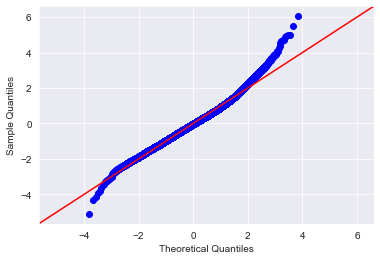

In [36]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


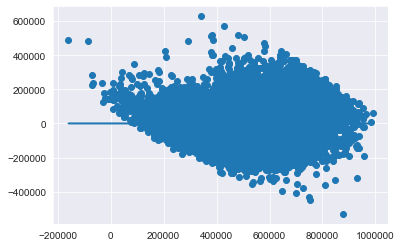

In [37]:
plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df))])

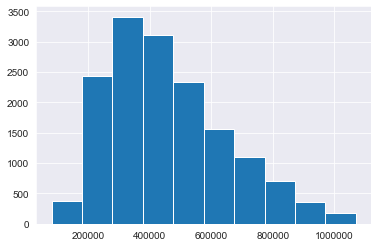

In [38]:
df.price.hist()

In [39]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

0.8 percentile: 622380.0000000001
0.81 percentile: 630000.0
0.82 percentile: 640000.0
0.83 percentile: 650000.0
0.84 percentile: 661000.0
0.85 percentile: 675000.0
0.86 percentile: 686000.0
0.87 percentile: 700000.0
0.88 percentile: 712500.0
0.89 percentile: 725000.0
0.9 percentile: 740000.0
0.91 percentile: 754785.0000000006
0.92 percentile: 775000.0
0.93 percentile: 790000.0
0.94 percentile: 809000.0
0.95 percentile: 831000.0
0.96 percentile: 855054.0800000001
0.97 percentile: 890000.0
0.98 percentile: 930000.0
0.99 percentile: 980000.0


In [47]:
orig_tot = len(df)
df = df[df.price < 850000.0] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)


Percent removed: 0.014244070491586061


In [48]:
X = df[x_cols]
y = df['price']

In [49]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     2851.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:26:59   Log-Likelihood:            -1.9157e+05
No. Observations:               14879   AIC:                         3.832e+05
Df Residuals:                   14867   BIC:                         3.833e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.215e+04   1038.253    -11.700      0.000   -1.42e+04   -1.01e+04
bathrooms              5125.0889   1334.666      3.840      0.000    2508.978    7741.200
sqft_living            8.814e+04   1697.328     51.931      0.000    8.48e+04    9.15e+04
sqft_lot               6214.0758    992.314      6.262      0.000    4269.018    8159.133
distance_from_a_city  -9.553e+04    947.822   -100.785      0.000   -9.74e+04   -9.37e+04
Years_last_renovation  1.228e+04   1259.829      9.751      0.000    9815.336    1.48e+04
basement              -2.296e+04   1777.388    -12.918      0.000   -2.64e+04   -1.95e+04
cond3                  4.619e+05   1387.557    332.863      0.000    4.59e+05    4.65e+05
grade                  5.075e+04   1252.908     40.503      0.000    4.83e+04    5.32e+04
biggerliving          -2.582e+04   1911.222    -13.512      0.000   -2.96e+04   -2.21e+04
cond4                  4.789e+05   1904.467    251.465      0.000    4.75e+05    4.83e+05
cond5                  5.056e+05   3143.155    160.870      0.000    4.99e+05    5.12e+05
==============================================================================
Omnibus:                      202.036   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              256.897
Skew:                           0.204   Prob(JB):                     1.64e-56
Kurtosis:                       3.498   Cond. No.                         7.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

12 12
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'distance_from_a_city']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-1.215e+04,1038.253,-11.700,0.0,-1.42e+04,-1.01e+04
bathrooms,5125.0889,1334.666,3.840,0.0,2508.978,7741.200
sqft_living,8.814e+04,1697.328,51.931,0.0,8.48e+04,9.15e+04
sqft_lot,6214.0758,992.314,6.262,0.0,4269.018,8159.133
distance_from_a_city,-9.553e+04,947.822,-100.785,0.0,-9.74e+04,-9.37e+04


In [51]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     2851.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:27:01   Log-Likelihood:            -1.9157e+05
No. Observations:               14879   AIC:                         3.832e+05
Df Residuals:                   14867   BIC:                         3.833e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.215e+04   1038.253    -11.700      0.000   -1.42e+04   -1.01e+04
bathrooms              5125.0889   1334.666      3.840      0.000    2508.978    7741.200
sqft_living            8.814e+04   1697.328     51.931      0.000    8.48e+04    9.15e+04
sqft_lot               6214.0758    992.314      6.262      0.000    4269.018    8159.133
distance_from_a_city  -9.553e+04    947.822   -100.785      0.000   -9.74e+04   -9.37e+04
Years_last_renovation  1.228e+04   1259.829      9.751      0.000    9815.336    1.48e+04
basement              -2.296e+04   1777.388    -12.918      0.000   -2.64e+04   -1.95e+04
cond3                  4.619e+05   1387.557    332.863      0.000    4.59e+05    4.65e+05
grade                  5.075e+04   1252.908     40.503      0.000    4.83e+04    5.32e+04
biggerliving          -2.582e+04   1911.222    -13.512      0.000   -2.96e+04   -2.21e+04
cond4                  4.789e+05   1904.467    251.465      0.000    4.75e+05    4.83e+05
cond5                  5.056e+05   3143.155    160.870      0.000    4.99e+05    5.12e+05
==============================================================================
Omnibus:                      202.036   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              256.897
Skew:                           0.204   Prob(JB):                     1.64e-56
Kurtosis:                       3.498   Cond. No.                         7.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.7819035736220146),
 ('bathrooms', 2.9025858836939937),
 ('sqft_living', 4.550952172677436),
 ('sqft_lot', 1.635513123795794),
 ('distance_from_a_city', 1.4610101509868414),
 ('Years_last_renovation', 2.5968953852960657),
 ('basement', 1.2171998952054333),
 ('cond3', 2.10504939103768),
 ('grade', 2.364651435575942),
 ('biggerliving', 1.4723405403491998),
 ('cond4', 1.6214553421974045),
 ('cond5', 1.2268374674031348)]

In [53]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5.5]
print(len(vif_scores), len(x_cols))

12 12


In [54]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     2851.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:27:03   Log-Likelihood:            -1.9157e+05
No. Observations:               14879   AIC:                         3.832e+05
Df Residuals:                   14867   BIC:                         3.833e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.215e+04   1038.253    -11.700      0.000   -1.42e+04   -1.01e+04
bathrooms              5125.0889   1334.666      3.840      0.000    2508.978    7741.200
sqft_living            8.814e+04   1697.328     51.931      0.000    8.48e+04    9.15e+04
sqft_lot               6214.0758    992.314      6.262      0.000    4269.018    8159.133
distance_from_a_city  -9.553e+04    947.822   -100.785      0.000   -9.74e+04   -9.37e+04
Years_last_renovation  1.228e+04   1259.829      9.751      0.000    9815.336    1.48e+04
basement              -2.296e+04   1777.388    -12.918      0.000   -2.64e+04   -1.95e+04
cond3                  4.619e+05   1387.557    332.863      0.000    4.59e+05    4.65e+05
grade                  5.075e+04   1252.908     40.503      0.000    4.83e+04    5.32e+04
biggerliving          -2.582e+04   1911.222    -13.512      0.000   -2.96e+04   -2.21e+04
cond4                  4.789e+05   1904.467    251.465      0.000    4.75e+05    4.83e+05
cond5                  5.056e+05   3143.155    160.870      0.000    4.99e+05    5.12e+05
==============================================================================
Omnibus:                      202.036   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              256.897
Skew:                           0.204   Prob(JB):                     1.64e-56
Kurtosis:                       3.498   Cond. No.                         7.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

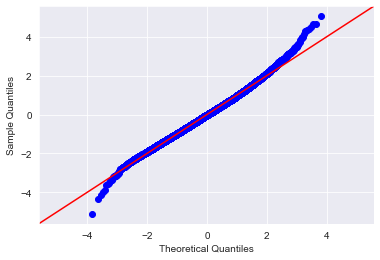

In [55]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


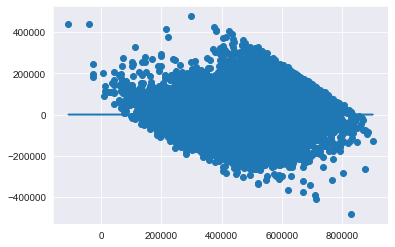

In [56]:
plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df))])

0.8 percentile: 590000.0
0.81 percentile: 599950.0
0.82 percentile: 605000.0
0.83 percentile: 615000.0
0.84 percentile: 625000.0
0.85 percentile: 634844.9999999999
0.86 percentile: 645000.0
0.87 percentile: 650826.8000000003
0.88 percentile: 664000.0
0.89 percentile: 675000.0
0.9 percentile: 687003.0
0.91 percentile: 700000.0
0.92 percentile: 711000.0
0.93 percentile: 725000.0
0.94 percentile: 739931.6799999999
0.95 percentile: 750000.0
0.96 percentile: 769000.0
0.97 percentile: 785000.0
0.98 percentile: 800000.0
0.99 percentile: 825000.0


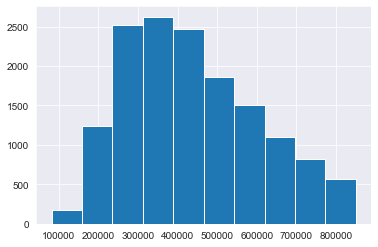

In [57]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

df.price.hist()

In [59]:
df = df[df.price <= 780000.0]


In [60]:
X =df[x_cols]
y=df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     2506.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        00:27:14   Log-Likelihood:            -1.8491e+05
No. Observations:               14408   AIC:                         3.698e+05
Df Residuals:                   14396   BIC:                         3.699e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
bedrooms              -1.172e+04   1014.694    -11.547      0.000   -1.37e+04   -9728.015
bathrooms              5652.6355   1304.734      4.332      0.000    3095.189    8210.082
sqft_living            8.328e+04   1664.304     50.037      0.000       8e+04    8.65e+04
sqft_lot               5771.1973    974.392      5.923      0.000    3861.263    7681.132
distance_from_a_city   -9.14e+04    933.439    -97.920      0.000   -9.32e+04   -8.96e+04
Years_last_renovation  1.158e+04   1238.437      9.351      0.000    9152.683     1.4e+04
basement              -2.049e+04   1734.577    -11.813      0.000   -2.39e+04   -1.71e+04
cond3                  4.555e+05   1362.852    334.233      0.000    4.53e+05    4.58e+05
grade                   4.75e+04   1236.324     38.419      0.000    4.51e+04    4.99e+04
biggerliving          -2.549e+04   1869.413    -13.634      0.000   -2.92e+04   -2.18e+04
cond4                  4.718e+05   1866.993    252.698      0.000    4.68e+05    4.75e+05
cond5                  4.963e+05   3085.803    160.817      0.000     4.9e+05    5.02e+05
==============================================================================
Omnibus:                      109.796   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.984
Skew:                           0.152   Prob(JB):                     5.95e-29
Kurtosis:                       3.352   Cond. No.                         7.60
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

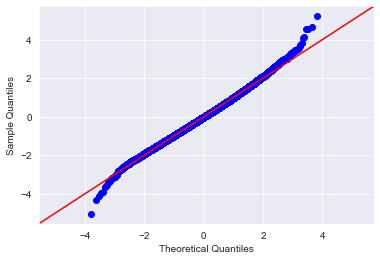

In [61]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


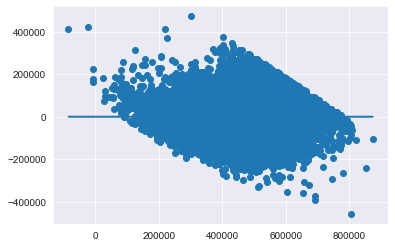

In [62]:
plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df))])

In [63]:
def plot_residuals(resids):
    plt.hist(resids)
    plt.title("Residuals")
    plt.show()
    
    xspace = np.linspace(0, 1, len(resids))
    plt.scatter(xspace, resids)
    plt.title("resids")
    plt.hlines(0, xmin=0, xmax=1)
    plt.show()

In [64]:
residuals = model.resid

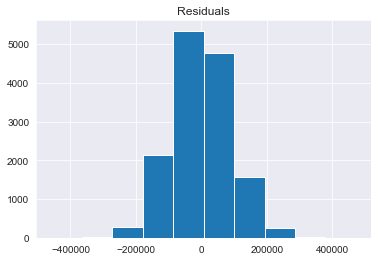

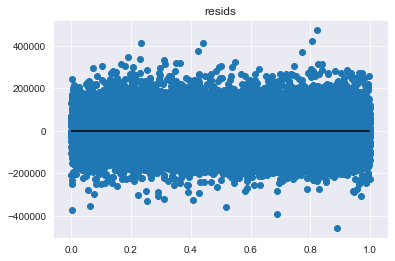

In [65]:
plot_residuals(residuals)

In [66]:
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

In [67]:
ols = LinearRegression(fit_intercept=False, normalize=False, n_jobs=-1)

In [68]:
cv5_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) )
cv10_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=10, n_jobs=-1) )
cv20_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5_scores,cv10_scores,cv20_scores

(0.6535345271163401, 0.6502169419649587, 0.6507185573906157)

In [69]:
cv5mse_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_squared_error', cv=5, n_jobs=-1) )
cv10mse_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_squared_error', cv=10, n_jobs=-1) )
cv20mse_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_squared_error', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5mse_scores,cv10mse_scores,cv20mse_scores

(-8262306965.819494, -8273985818.492259, -8251601274.669522)

In [70]:
cv5mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1) )
cv10mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1) )
cv20mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5mae_scores,cv10mae_scores,cv20mae_scores

(-71767.55074176911, -71813.80005690742, -71715.93111140122)

In [71]:
def make_ols_sklearn(X, y, test_size=0.20, fit_intercept=False, standardize=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    if standardize:
        ss = StandardScaler()
        ss.fit(X_train)
        X_train = ss.transform(X_train)
        X_test = ss.transform(X_test)
    ols = LinearRegression(fit_intercept=fit_intercept, normalize=False)
    ols.fit(X_train, y_train)
    train_score = ols.score(X_train, y_train)
    test_score = ols.score(X_test, y_test)
    cv5_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) )
    cv10_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=10, n_jobs=-1) )
    cvmse_5 = np.mean(cross_val_score(ols,X , y, cv=5, scoring='neg_mean_squared_error'))
    cvmse_10 = np.mean(cross_val_score(ols,X, y, cv=10, scoring='neg_mean_squared_error'))
    print(f"train R2 score = {train_score}")
    print(f"test R2 score = {test_score}")
    print(f"cv5 R2 score = {cv5_scores}")
    print(f"cv10 R2 score = {cv10_scores}")
    print(f"cv5 MSE score = {cvmse_5}")
    print(f"cv10  MSE score = {cvmse_10}")

    return ols

In [72]:
make_ols_sklearn(X, y)

train R2 score = 0.6553972937782078
test R2 score = 0.6625664937188229
cv5 R2 score = 0.6535345271163401
cv10 R2 score = 0.6502169419649587
cv5 MSE score = -8262306965.819494
cv10  MSE score = -8273985818.492256


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [73]:
make_ols_sklearn(X, y)

train R2 score = 0.6594847370746988
test R2 score = 0.6464756413000741
cv5 R2 score = 0.6535345271163401
cv10 R2 score = 0.6502169419649587
cv5 MSE score = -8262306965.819494
cv10  MSE score = -8273985818.492256


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [74]:
residuals = model.resid
resid = pd.DataFrame(df['price'])
resid['residuals']  = residuals

In [75]:
resid['residuals']  = residuals

In [76]:
resid

,price,residuals
0,538000.0,61025.932813
1,180000.0,-47495.281122
2,604000.0,129007.772828
3,510000.0,27500.164943
4,257500.0,-4996.701289
...,...,...
17201,475000.0,10999.307719
17202,360000.0,-97689.362702
17203,400000.0,-109287.391095
17204,402101.0,-63927.544700


In [77]:
import seaborn as sns

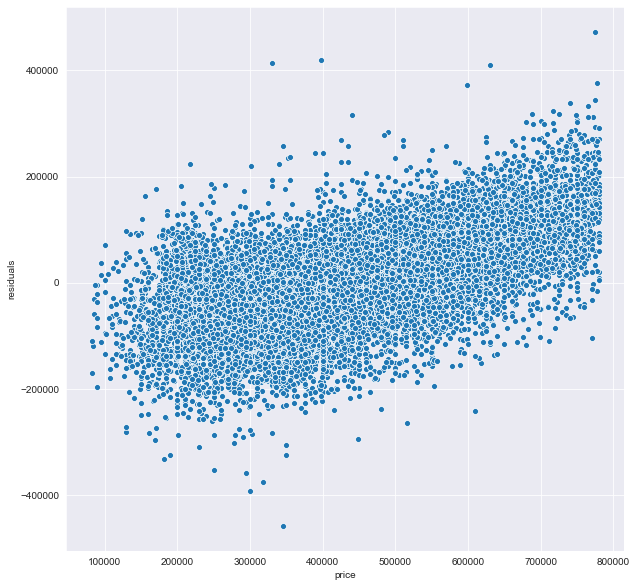

In [78]:
plt.figure(figsize= (10,10))

sns.scatterplot(y='residuals',x='price',data=resid)